# Ising Model
This notebook is based on the algorithms stored in `ising.py` script

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ising import *
from IPython import display
import matplotlib as mpl

# parameters for plots
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# critical temperature for ising2d
T_c = 2/np.log(1+np.sqrt(2))

## Equilibrium configuration
We plot the evolution of the system for 3 different temperature
- $T<T_c$
- $T=T_c$
- $T>T_c$

First we use matropolis algorithm and then metropolis in mean field approximation

Befor run the code we plot the magnetization over steps to be sure to use the right number of iterations and reach the equilibrium

In [ ]:
# we run the metropolis algorithm in order to test it
test = Ising(50, 50, 0.5, 0, 1)
for _ in range(2000000):
    test.metropolis(1)
# we visualize the magnetization in order to see if the system reach the equilibrium
plt.plot(test.mag);

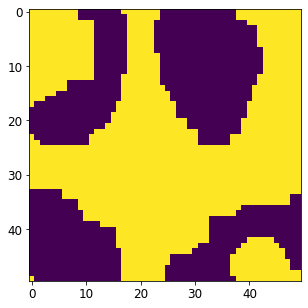

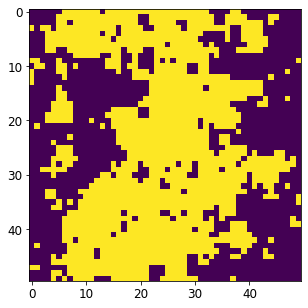

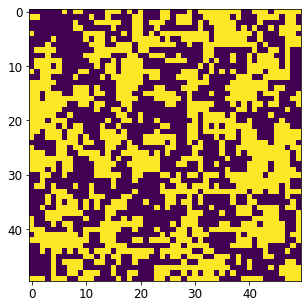

In [5]:
# we run again the metropolis algorithm for three different temperatures
#this time we save the image of the final configuration in order to visualize the final state of the system
temperatures = [0.5, T_c, 4]

for T in temperatures:
    # create initial random configuration
    ising = Ising(50, 50, T, 0, 1)

    # set up figure, plot first frame
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    # draw the initial configuration,
    # naming the plot "im".
    im = ax.imshow(ising.matrix)
    
    for t in range(10000):
        # update the system
        ising.metropolis(10)
        # replot every 1000 MC updates
        if t%100==0:
            # update the data of the plot (not the whole figure!)
            im.set_data(ising.matrix)
            # rerender
            display.display(plt.gcf())
            display.clear_output(wait=True)


    # save the final configuration
    fig.savefig(f'./fig/final_state_{T}.pdf', dpi=720)

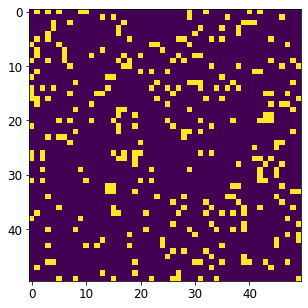

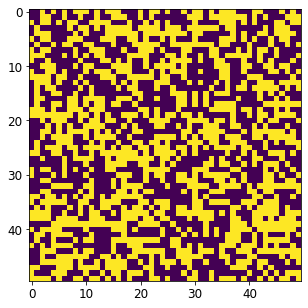

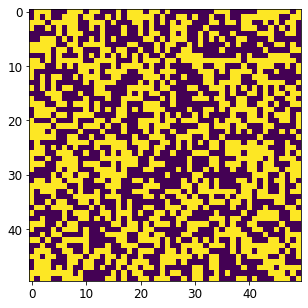

In [2]:
# we apply the same procedure as the cell above, but we use the metropolis algorithm with the mean_field approximation

# note: for mf approx the critical temperature is 4 (T_c = J*4/kb)
temperatures = [3, 4, 5]

for T in temperatures:
    # create initial random configuration
    ising = Ising(50, 50, T, 0, 1)

    # set up figure, plot first frame
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    # draw the initial configuration,
    # naming the plot "im".
    im = ax.imshow(ising.matrix)
    
    
    for t in range(10000):
        # update the system
        ising.metropolis_mf(100)
        # replot every 1000 MC updates
        
        if t%100==0:
            # update the data of the plot (not the whole figure!)
            im.set_data(ising.matrix)
            # rerender
            display.display(plt.gcf())
            display.clear_output(wait=True)
        
    
    # save the final configuration
    fig.savefig(f'./fig/final_state_mf_{T}.pdf', dpi=720)

## Energy Plot for Wolff algorithm
We now plot the energy as a function of the number of step to see after how many sweeps the system reach the equilibrium

In [3]:
# set system size, temperature
n1 = 50
n2 = 50
T1 = 1.5
T2 = 3.5
T_c = 2/np.log(1+np.sqrt(2))

# run some Wolff sweeps, check if equilibrium
ising_T1 = Ising(n1, n2, T=T1, B=0, J=1)
ising_T2 = Ising(n1, n2, T=T2, B=0, J=1)
ising_T_c = Ising(n1, n2, T=T_c, B=0, J=1)

for i in range(50):
    ising_T1.update_ham()
    ising_T2.update_ham()
    ising_T_c.update_ham()
    ising_T1.SweepWolff()
    ising_T2.SweepWolff()
    ising_T_c.SweepWolff()

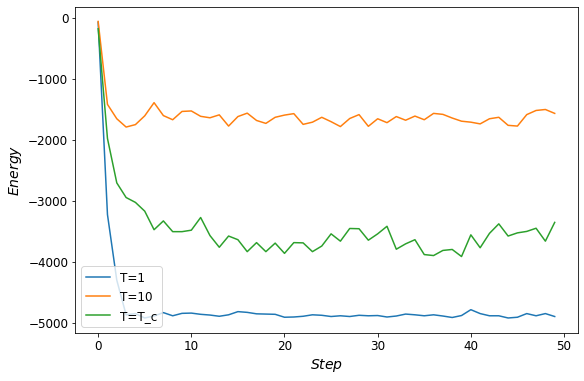

In [4]:
E_T1 = ising_T1.ham
E_T2 = ising_T2.ham
E_T_c = ising_T_c.ham

fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(E_T1, label="T=1")
ax.plot(E_T2, label="T=10")
ax.plot(E_T_c, label="T=T_c")

ax.set_xlabel("$Step$")
ax.set_ylabel("$Energy$")
ax.legend(loc=3)

We can see that after around 10 step the system reach the equilibrium.

Since our algorithm is stochastic we also want to be sure that the behaviour we analyze is indipendent on the run. We perform 30 runs for a fixed temperature and store the final magnetization. Then we plot the histogram of the obtained distribution.

In [17]:
mag_stat = []

# set system size, temperature
n1 = 50
n2 = 50
T = 1.75
n_runs = 500

for _ in range(n_runs):
    ising_T = Ising(n1, n2, T=T, B=0, J=1)
    for i in range(10):
        ising_T.update_mag()
        ising_T.SweepWolff()
    mag_stat.append(np.abs(ising_T.mag[-1]))

Variance of the distribution:  5.379705599999994e-05 



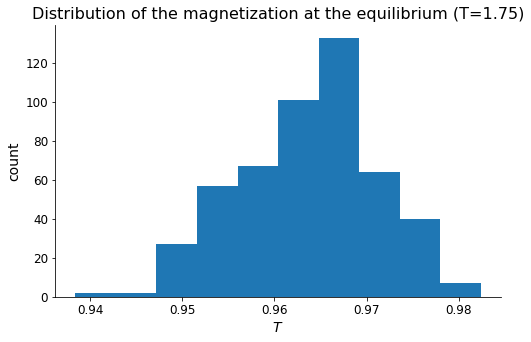

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

ax.hist(mag_stat, bins=10)
ax.set_title('Distribution of the magnetization at the equilibrium (T=1.75)')
ax.set_xlabel('$T$')
ax.set_ylabel('count')
fig.savefig(f'./fig/hist_mag.pdf', dpi=400)

print('Variance of the distribution: ', np.var(mag_stat), '\n')

From this result we can observe that all the 500 runs have the same behaviour infact the variance of the distribution is really low.

---

In [10]:
# we run compute_mag_wolff function to obtain the evolution of magnetization over temperature

temp, mag = compute_mag_wolff(100,100,0,1,1.5,3.5,80,10)

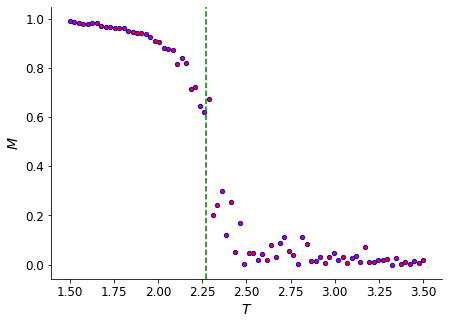

In [11]:
# we visualize the results in the M T plane
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.scatter(temp, mag, edgecolors="b", color="r", s=18)
ax.axvline(T_c, c="green", lw=1.5, ls = "dashed")
#ax.set_title("Magnetization over temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")
fig.savefig('./fig/M-T.pdf', dpi=720)

We want to compare numerical solution with theoretical one

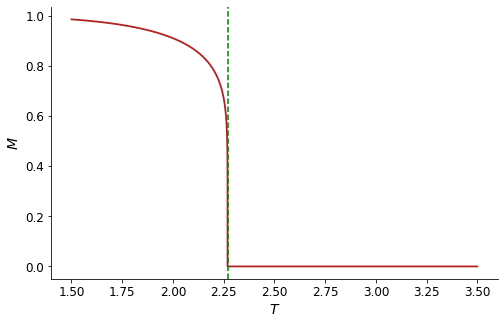

In [2]:
x_fin, y_fin = onsager_solution()

# we visualize the theoretical curve
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(8,5))
plt.plot(x_fin, y_fin, lw=1.8, c="firebrick")
ax.axvline(T_c, c="g", lw=1.5, ls = "dashed")
#ax.set_title("Theoretical Magnetization over Temperature", pad=20)
ax.set_xlabel("$T$")
ax.set_ylabel("$M$");

fig.savefig('./fig/mag_onsager.pdf', dpi=720)

---

### Basin of attraction
We visualize in the M-T plane the step by step evolution of the magnetization.

In [35]:
%%time

temp, mag = mag_evol(250,250,0,1,1.5,3.5,70,15)

CPU times: user 9min 54s, sys: 112 ms, total: 9min 55s
Wall time: 9min 55s


In [38]:
x = np.linspace(1.5,T_c-0.0001,10000000)
x2 = np.linspace(T_c,3.5,3)
x_fin = np.append(x,x2)
y_fin = np.append(onsager_solution(x),[0,0,0])

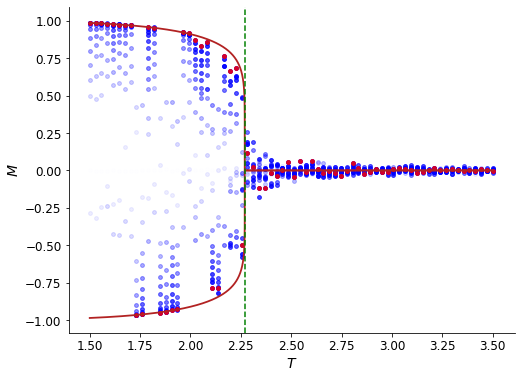

In [39]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(8,6))
for i, t in enumerate(temp):
    temper = [t]*len(mag[i])
    for j in range(len(mag[i])):
        ax.scatter(t, mag[i][j], color="b", s=15, alpha=(j+0.05)/(len(mag[i])+0.05))
    ax.scatter(t, mag[i][-1], color="r", s=15, alpha=0.8)
ax.plot(x_fin, y_fin, lw=1.8, c="firebrick")
ax.plot(x_fin, -y_fin, lw=1.8, c="firebrick")
ax.axvline(T_c, c="green", lw=1.5, ls = "dashed")
#ax.set_title("Magnetization over Temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$");

fig.savefig('./fig/mag_evol.pdf', dpi=720)

We now perform the same analysis, but using the mean field model.

In [13]:
%%time

temp_mf, mag_mf = mag_evol_mf(250,250,0,1,2.5,4.5,70,15)

CPU times: user 4h 53min 4s, sys: 1min 6s, total: 4h 54min 11s
Wall time: 5h 1min 21s


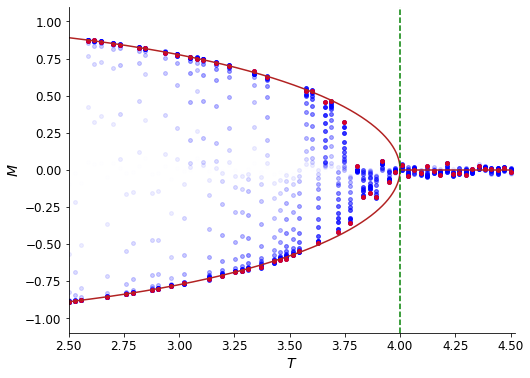

In [18]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# to plot the theoretical curve
y = np.linspace(0.0001,1,100000)
x = 8*y / np.log((1+y)/(1-y))

fig, ax = plt.subplots(1, 1, figsize=(8,6))
for i, t in enumerate(temp_mf):
    temper = [t]*len(mag_mf[i])
    for j in range(len(mag_mf[i])):
        ax.scatter(t, mag_mf[i][j], color="b", s=15, alpha=(j+0.05)/(len(mag_mf[i])+0.05))
    ax.scatter(t, mag_mf[i][-1], color="r", s=15, alpha=0.8)

# theoretical
ax.plot(x, y, c='firebrick')
ax.plot(x, -y, c='firebrick')
ax.plot(np.linspace(4,4.5,2), [0,0], c='firebrick')
ax.axvline(4, c="green", lw=1.5, ls = "dashed")

#ax.set_title("Magnetization over Temperature")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$");

plt.xlim(2.5,4.52)

fig.savefig('./fig/mag_evol_mf_upgrade.pdf', dpi=400)